In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import qutip as qt
plt.style.use(['science', 'ieee'])
plt.style.use('science')
qt.settings.auto_tidyup = True

In [3]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [4]:
def purity(rho):
    if isinstance(rho, list):
        mylist = []
        for idx, val in enumerate(rho):
            mylist.append(((val * val).tr()))
        return mylist
    else:
        return (rho * rho).tr()
#     return (rho * rho).tr()

In [5]:
def plot_wigner(rho, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for a Harmonic oscillator mode
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1,1,figsize=(8,8))
        
    if qt.isket(rho):
        rho = qt.ket2dm(rho)
        
    xvec = np.linspace(-7.5, 7.5, 200)
    
    W = qt.wigner(rho, xvec, xvec)
    wlim = np.abs(W).max()
    
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap("RdYlBu"))
    ax.set_xlabel(r"$x_1$", fontsize=16)
    ax.set_ylabel(r"$x_2$", fontsize=16)
    
    return ax

# $\hat{a}^2$ and $\hat{a}$

Let us generate some evolution

In [33]:
# input parameters
N = 35 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_2 = 8.0 #two-photon loss rate
omega = 0.0 # free Hamiltonian frequency
alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian

# input state
psi0 = qt.coherent(N, alphain, method="operator")

def two_photon_decay(gamma_1):
    coplist = [np.sqrt(gamma_2) * a**2, np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [])
    return result.states

In [7]:
def phase(alpha):
    return qt.ket2dm((alpha * qt.fock(N, 0)  + np.sqrt(1-alpha**2) * qt.fock(N, 1)).unit())

In [35]:
# graph of fidelities to target states

steady_state = phase(1/np.sqrt(2))
const_list_1 = np.full(len(tlist), 1)


# gamma_1 = 0.0
states_0 = two_photon_decay(0)
# fidelity to steady state
fid_list_steady_0 = []
for idx, val in enumerate(states_0):
    fid_list_steady_0.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_0 = []
for idx, val in enumerate(states_0):
    fid_list_vacuum_0.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_0 = []
for idx, val in enumerate(states_0):
    fid_list_one_0.append(qt.fidelity(val, qt.fock(N, 1)))

# fidelity to equivalent coherent state
fid_list_coh_0 = []
for idx, val in enumerate(states_0):
    fid_list_coh_0.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
   

    
# gamma_1 = 1.0
states_1 = two_photon_decay(1)
# fidelity to steady state
fid_list_steady_1 = []
for idx, val in enumerate(states_1):
    fid_list_steady_1.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_1 = []
for idx, val in enumerate(states_1):
    fid_list_vacuum_1.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_1 = []
for idx, val in enumerate(states_1):
    fid_list_one_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_1 = []
for idx, val in enumerate(states_1):
    fid_list_coh_1.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
    
    
    
# gamma_1 = 2.0
states_2 = two_photon_decay(2)
# fidelity to steady state
fid_list_steady_2 = []
for idx, val in enumerate(states_2):
    fid_list_steady_2.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_2 = []
for idx, val in enumerate(states_2):
    fid_list_vacuum_2.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_2 = []
for idx, val in enumerate(states_2):
    fid_list_one_2.append(qt.fidelity(val, qt.fock(N, 1)))
    
    
# fidelity to equivalent coherent state
fid_list_coh_2 = []
for idx, val in enumerate(states_2):
    fid_list_coh_2.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
   
    
    
# gamma_1 = 20
states_20 = two_photon_decay(20)
# fidelity to steady state
fid_list_steady_20 = []
for idx, val in enumerate(states_20):
    fid_list_steady_20.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_20 = []
for idx, val in enumerate(states_20):
    fid_list_vacuum_20.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_20 = []
for idx, val in enumerate(states_20):
    fid_list_one_20.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_20 = []
for idx, val in enumerate(states_20):
    fid_list_coh_20.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
   
    

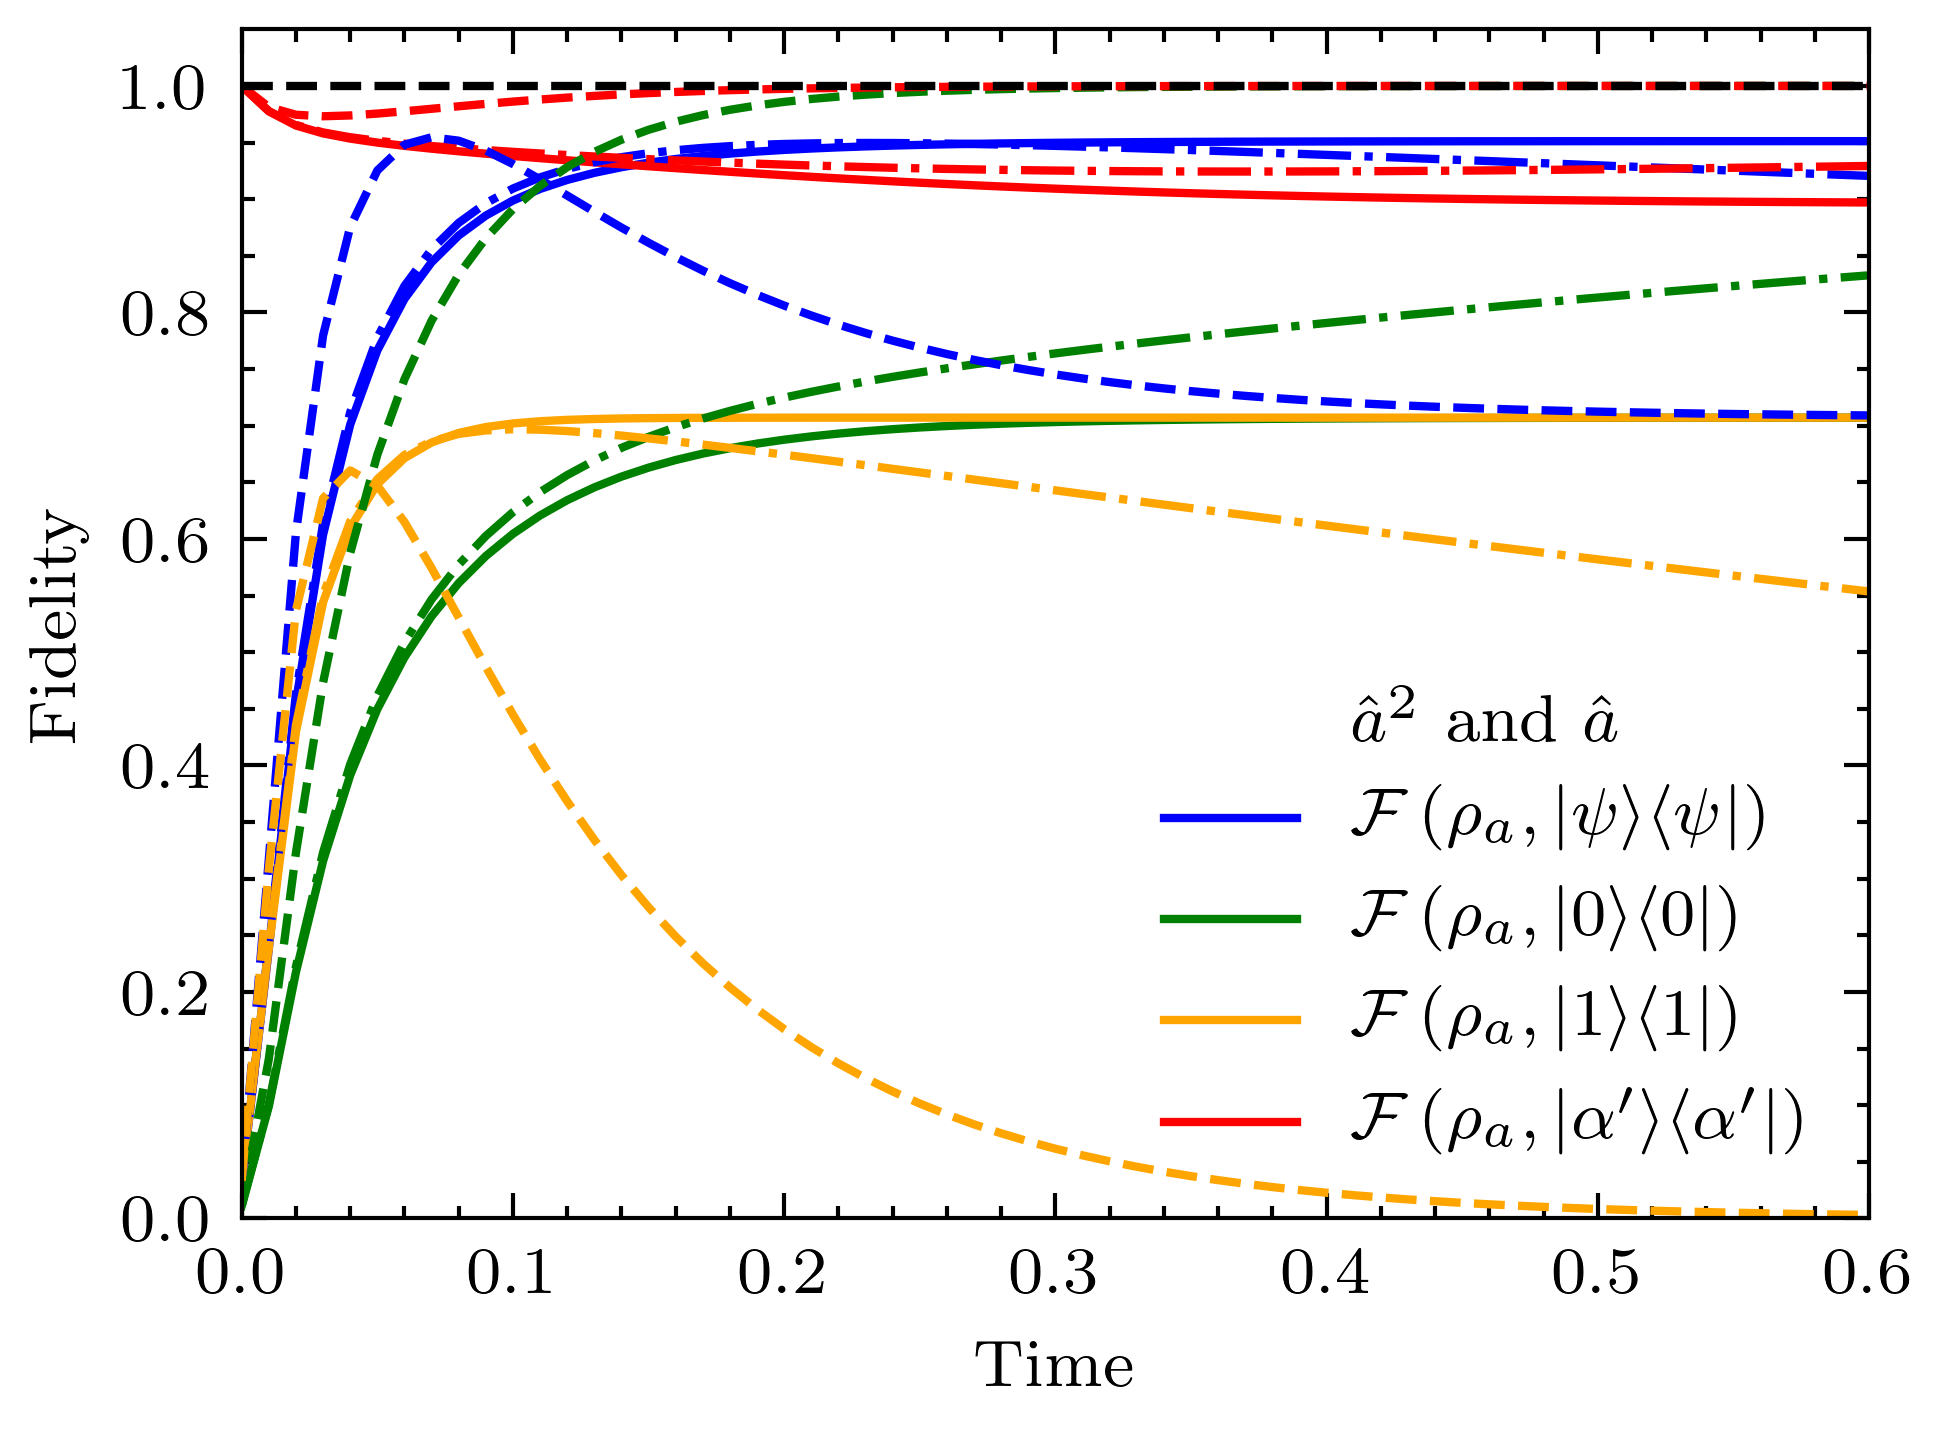

In [38]:
fig, ax = plt.subplots()

ax.plot(tlist, fid_list_steady_0, color="blue", label="$\\mathcal{F}\\left(\\rho_a, |\\psi\\rangle\\langle \\psi |\\right)$")
ax.plot(tlist, fid_list_vacuum_0, color="green", label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$")
ax.plot(tlist, fid_list_one_0, color="orange", label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$")
ax.plot(tlist, fid_list_coh_0, color="red", label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$")


ax.plot(tlist, fid_list_steady_1, color="blue", linestyle="-.")
ax.plot(tlist, fid_list_vacuum_1, color="green", linestyle="-.")
ax.plot(tlist, fid_list_one_1, color="orange", linestyle="-.")
ax.plot(tlist, fid_list_coh_1, color="red", linestyle="-.")

ax.plot(tlist, fid_list_steady_20, color="blue", linestyle="--")
ax.plot(tlist, fid_list_vacuum_20, color="green", linestyle="--")
ax.plot(tlist, fid_list_one_20, color="orange", linestyle="--")
ax.plot(tlist, fid_list_coh_20, color="red", linestyle="--")


ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}^2$ and $\\hat{a}$", loc=0)


fig.savefig("fidelities_aa_and_a.pdf")
fig.savefig("fidelities_aa_and_a.png", dpi=300)

# $\hat{a}\left(\hat{n}-1\right)$ and $\hat{a}$

Let's generate some evolution

In [19]:
# input parameters
options = qt.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)


# input state
psi0 = qt.coherent(N, alphain, method="operator")

def ncl_decay(gamma_1):
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [10]:
# graph of fidelities to target states

const_list_1 = np.full(len(tlist), 1)


# gamma_1 = 0.0
states_0 = ncl_decay(0)

    
# fidelity to vacuum state
fid_list_vacuum_0 = []
for idx, val in enumerate(states_0):
    fid_list_vacuum_0.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_0 = []
for idx, val in enumerate(states_0):
    fid_list_one_0.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_0 = []
for idx, val in enumerate(states_0):
    fid_list_coh_0.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
    
    
# gamma_1 = 1.0
states_1 = ncl_decay(1)

    
# fidelity to vacuum state
fid_list_vacuum_1 = []
for idx, val in enumerate(states_1):
    fid_list_vacuum_1.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_1 = []
for idx, val in enumerate(states_1):
    fid_list_one_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_1 = []
for idx, val in enumerate(states_1):
    fid_list_coh_1.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))   
    
# gamma_1 = 2.0
states_2 = ncl_decay(2)

    
# fidelity to vacuum state
fid_list_vacuum_2 = []
for idx, val in enumerate(states_2):
    fid_list_vacuum_2.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_2 = []
for idx, val in enumerate(states_2):
    fid_list_one_2.append(qt.fidelity(val, qt.fock(N, 1)))

    
# fidelity to equivalent coherent state
fid_list_coh_2 = []
for idx, val in enumerate(states_2):
    fid_list_coh_2.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))    
    
# gamma_1 = 20
states_20 = ncl_decay(20)

    
# fidelity to vacuum state
fid_list_vacuum_20 = []
for idx, val in enumerate(states_20):
    fid_list_vacuum_20.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_20 = []
for idx, val in enumerate(states_20):
    fid_list_one_20.append(qt.fidelity(val, qt.fock(N, 1)))

# fidelity to equivalent coherent state
fid_list_coh_20 = []
for idx, val in enumerate(states_20):
    fid_list_coh_20.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
    

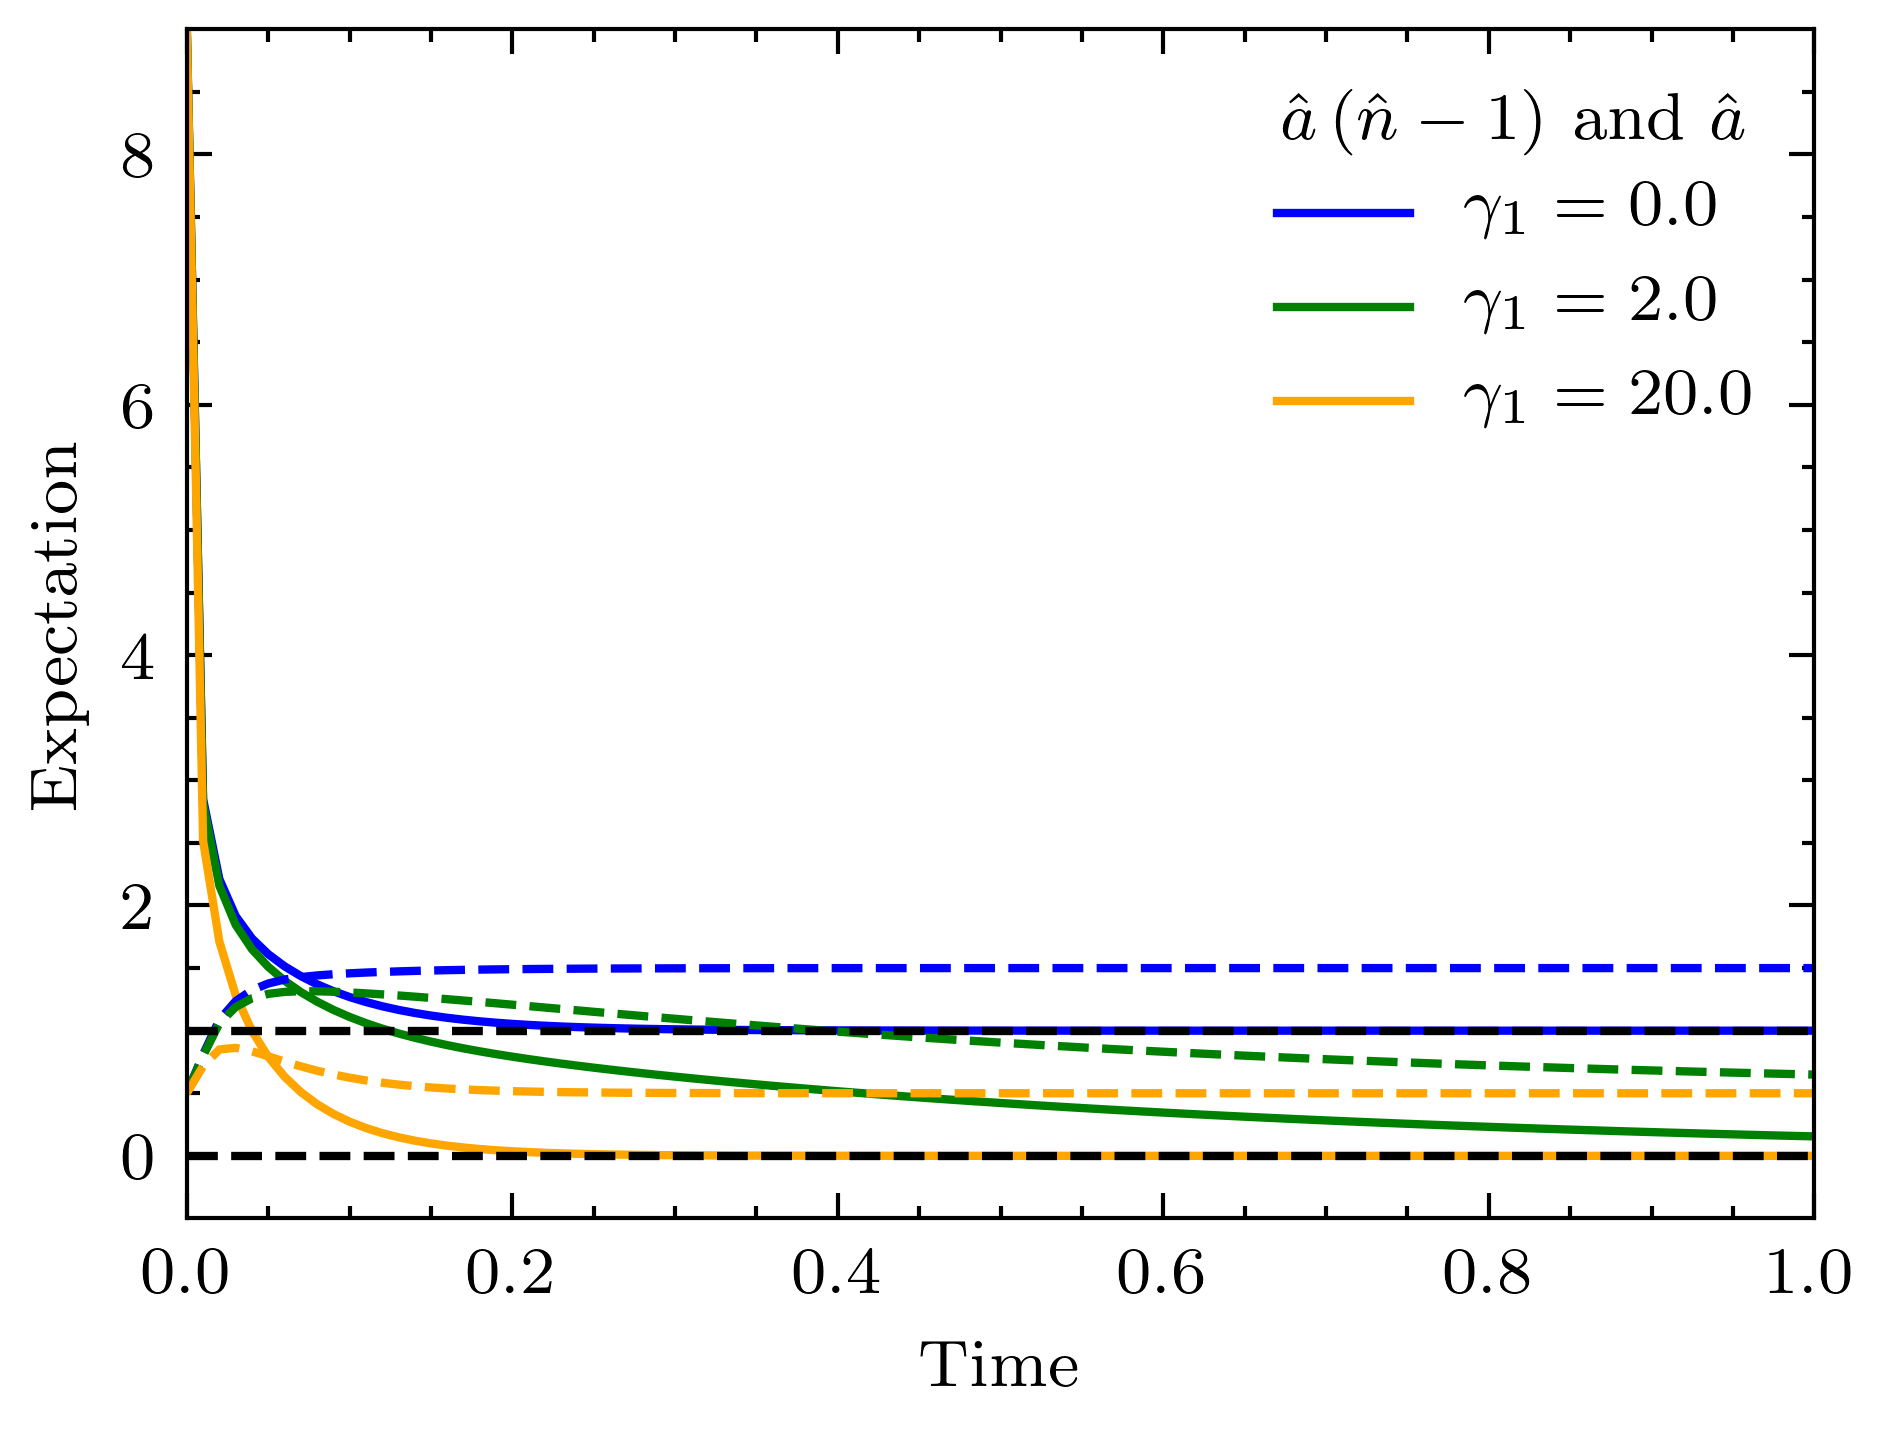

In [22]:
# graph of expectations

const_list_0 = np.full(len(tlist), 0)
const_list_1 = np.full(len(tlist), 1)

ymax = max(qt.expect(n, states_1))
fig, ax = plt.subplots()

ax.plot(tlist, qt.expect(n, states_0), color="blue", label="$\\gamma_1 = 0.0$")
ax.plot(tlist, qt.expect(n, states_2), color="green", label="$\\gamma_1 = 2.0$")
ax.plot(tlist, qt.expect(n, states_20), color="orange", label="$\\gamma_1 = 20.0$")
# ax.plot(tlist, qt.expect(a, result.states), label="$\\langle\\hat{a}\\rangle$")

ax.plot(tlist, qt.variance(x, states_0), color="blue" ,linestyle="--")
ax.plot(tlist, qt.variance(x, states_2), color="green" ,linestyle="--")
ax.plot(tlist, qt.variance(x, states_20), color="orange" ,linestyle="--")

ax.plot(tlist, const_list_0, color="black", linestyle="--")
ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Expectation")
# ax.legend(loc=0)
ax.legend(title = "$\\hat{a}\\left(\\hat{n} - 1\\right)$ and $\hat{a}$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.5,ymax]);

fig.savefig("expects_ncl1_and_a.pdf")
fig.savefig("expects_ncl1_and_a.png", dpi=300)

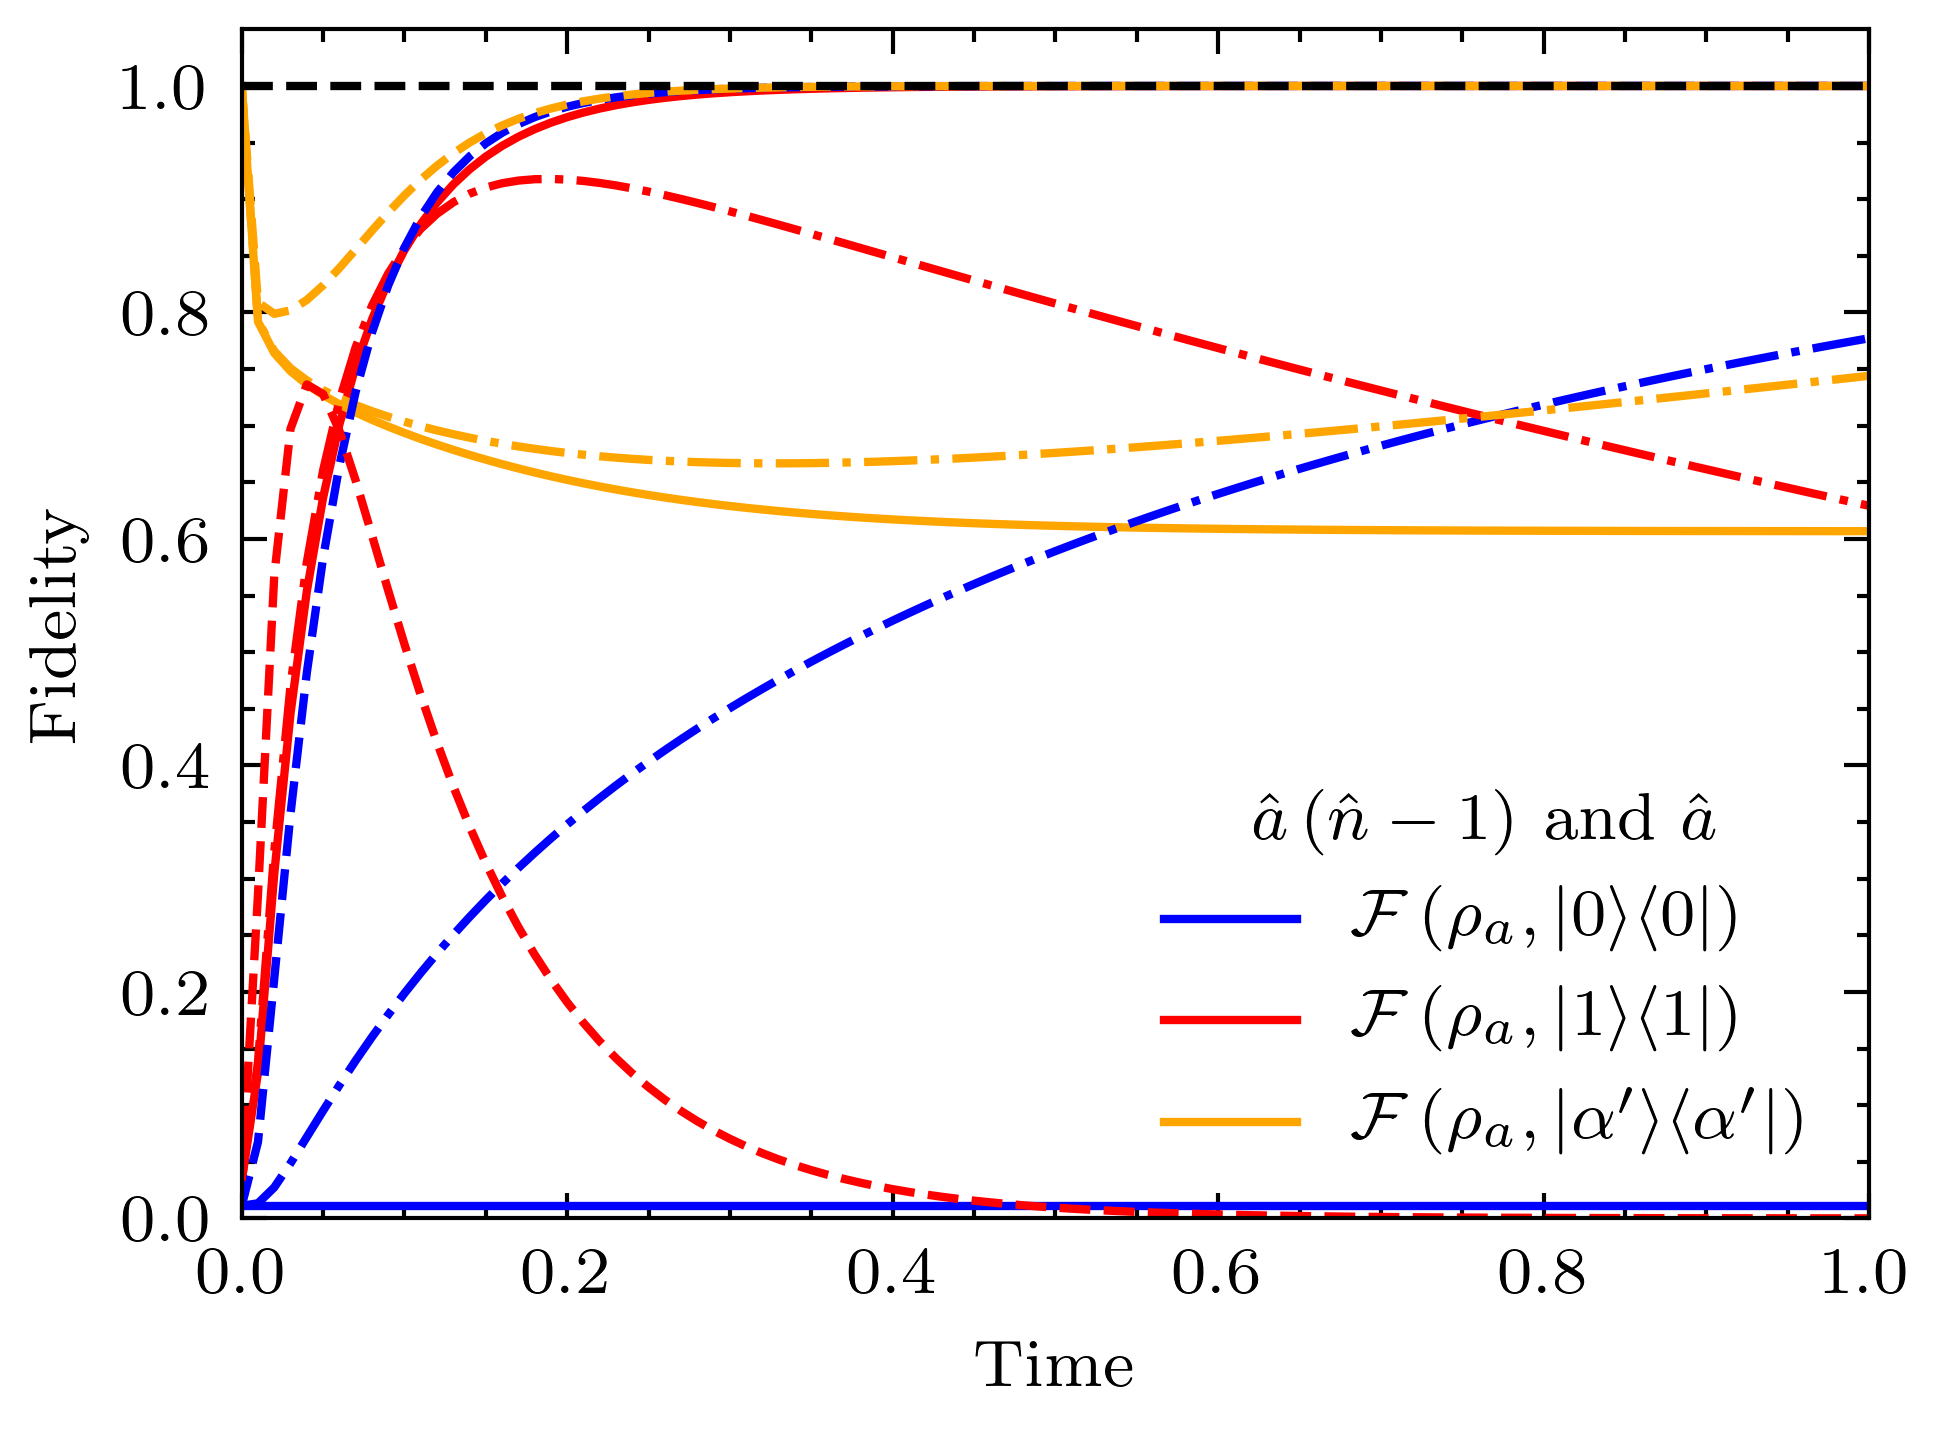

In [25]:
fig, ax = plt.subplots()

ax.plot(tlist, fid_list_vacuum_0, color="blue", label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$")
ax.plot(tlist, fid_list_one_0, color="red", label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$")
ax.plot(tlist, fid_list_coh_0, color="orange", label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$")


ax.plot(tlist, fid_list_vacuum_1, color="blue", linestyle="-.")
ax.plot(tlist, fid_list_one_1, color="red", linestyle="-.")
ax.plot(tlist, fid_list_coh_1, color="orange", linestyle="-.")

ax.plot(tlist, fid_list_vacuum_20, color="blue", linestyle="--")
ax.plot(tlist, fid_list_one_20, color="red", linestyle="--")
ax.plot(tlist, fid_list_coh_20, color="orange", linestyle="--")


ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
# ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)


fig.savefig("fidelities_ncl1_and_a.pdf")
fig.savefig("fidelities_ncl1_and_a.png", dpi=300)

# Does increasing $\alpha_{in}$ increase the max fidelity?

## NCL $\rightarrow$ single photons

Let's generate some evolution

In [70]:
# input parameters
options = qt.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

First, a graph showing that increasing alpha increases Fidelity to target state

In [46]:
#
# alpha = 2.0
#

#gamma_1 = 0.0
states_2_0 = ncl_decay(2.0, 0)

# gamma_1 = 1.0
states_2_1 = ncl_decay(2.0, 1)

# gamma_1 = 20.0
states_2_20 = ncl_decay(2.0, 20)

fid_list_one_2_0 = []
for idx, val in enumerate(states_2_0):
    fid_list_one_2_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_2_1 = []
for idx, val in enumerate(states_2_1):
    fid_list_one_2_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_2_20 = []
for idx, val in enumerate(states_2_20):
    fid_list_one_2_20.append(qt.fidelity(val, qt.fock(N, 1)))

print("alpha=2.0 done")    

alpha=2.0 done


In [47]:
#
# alpha = 3.0
#

#gamma_1 = 0.0
states_3_0 = ncl_decay(3.0, 0)


# gamma_1 = 1.0
states_3_1 = ncl_decay(3.0, 1)

# gamma_1 = 20.0
states_3_20 = ncl_decay(3.0, 20)

fid_list_one_3_0 = []
for idx, val in enumerate(states_3_0):
    fid_list_one_3_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_3_1 = []
for idx, val in enumerate(states_3_1):
    fid_list_one_3_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_3_20 = []
for idx, val in enumerate(states_3_20):
    fid_list_one_3_20.append(qt.fidelity(val, qt.fock(N, 1)))
    
print("alpha=3.0 done")    

alpha=3.0 done


In [48]:
#
# alpha = 4.0
#

#gamma_1 = 0.0
states_4_0 = ncl_decay(4.0, 0)

# gamma_1 = 1.0
states_4_1 = ncl_decay(4.0, 1)

# gamma_1 = 20.0
states_4_20 = ncl_decay(4.0, 20)

fid_list_one_4_0 = []
for idx, val in enumerate(states_4_0):
    fid_list_one_4_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_4_1 = []
for idx, val in enumerate(states_4_1):
    fid_list_one_4_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_4_20 = []
for idx, val in enumerate(states_4_20):
    fid_list_one_4_20.append(qt.fidelity(val, qt.fock(N, 1)))    

print("alpha=4.0 done")    

alpha=4.0 done


DONE: check normalization before I plot
    - $\alpha=5.0$ is not normalized

In [65]:
# input parameters
options = qt.Options(nsteps=20000)
N = 50 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [66]:
#
# alpha = 5.0
#

#gamma_1 = 0.0
states_5_0 = ncl_decay(5.0, 0)
print("alpha=5.0 done")    

# gamma_1 = 1.0
states_5_1 = ncl_decay(5.0, 1)
print("alpha=5.0 done")    

# gamma_1 = 20.0
states_5_20 = ncl_decay(5.0, 20)
print("alpha=5.0 done")    

fid_list_one_5_0 = []
for idx, val in enumerate(states_5_0):
    fid_list_one_5_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_5_1 = []
for idx, val in enumerate(states_5_1):
    fid_list_one_5_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_5_20 = []
for idx, val in enumerate(states_5_20):
    fid_list_one_5_20.append(qt.fidelity(val, qt.fock(N, 1)))  
    


alpha=5.0 done


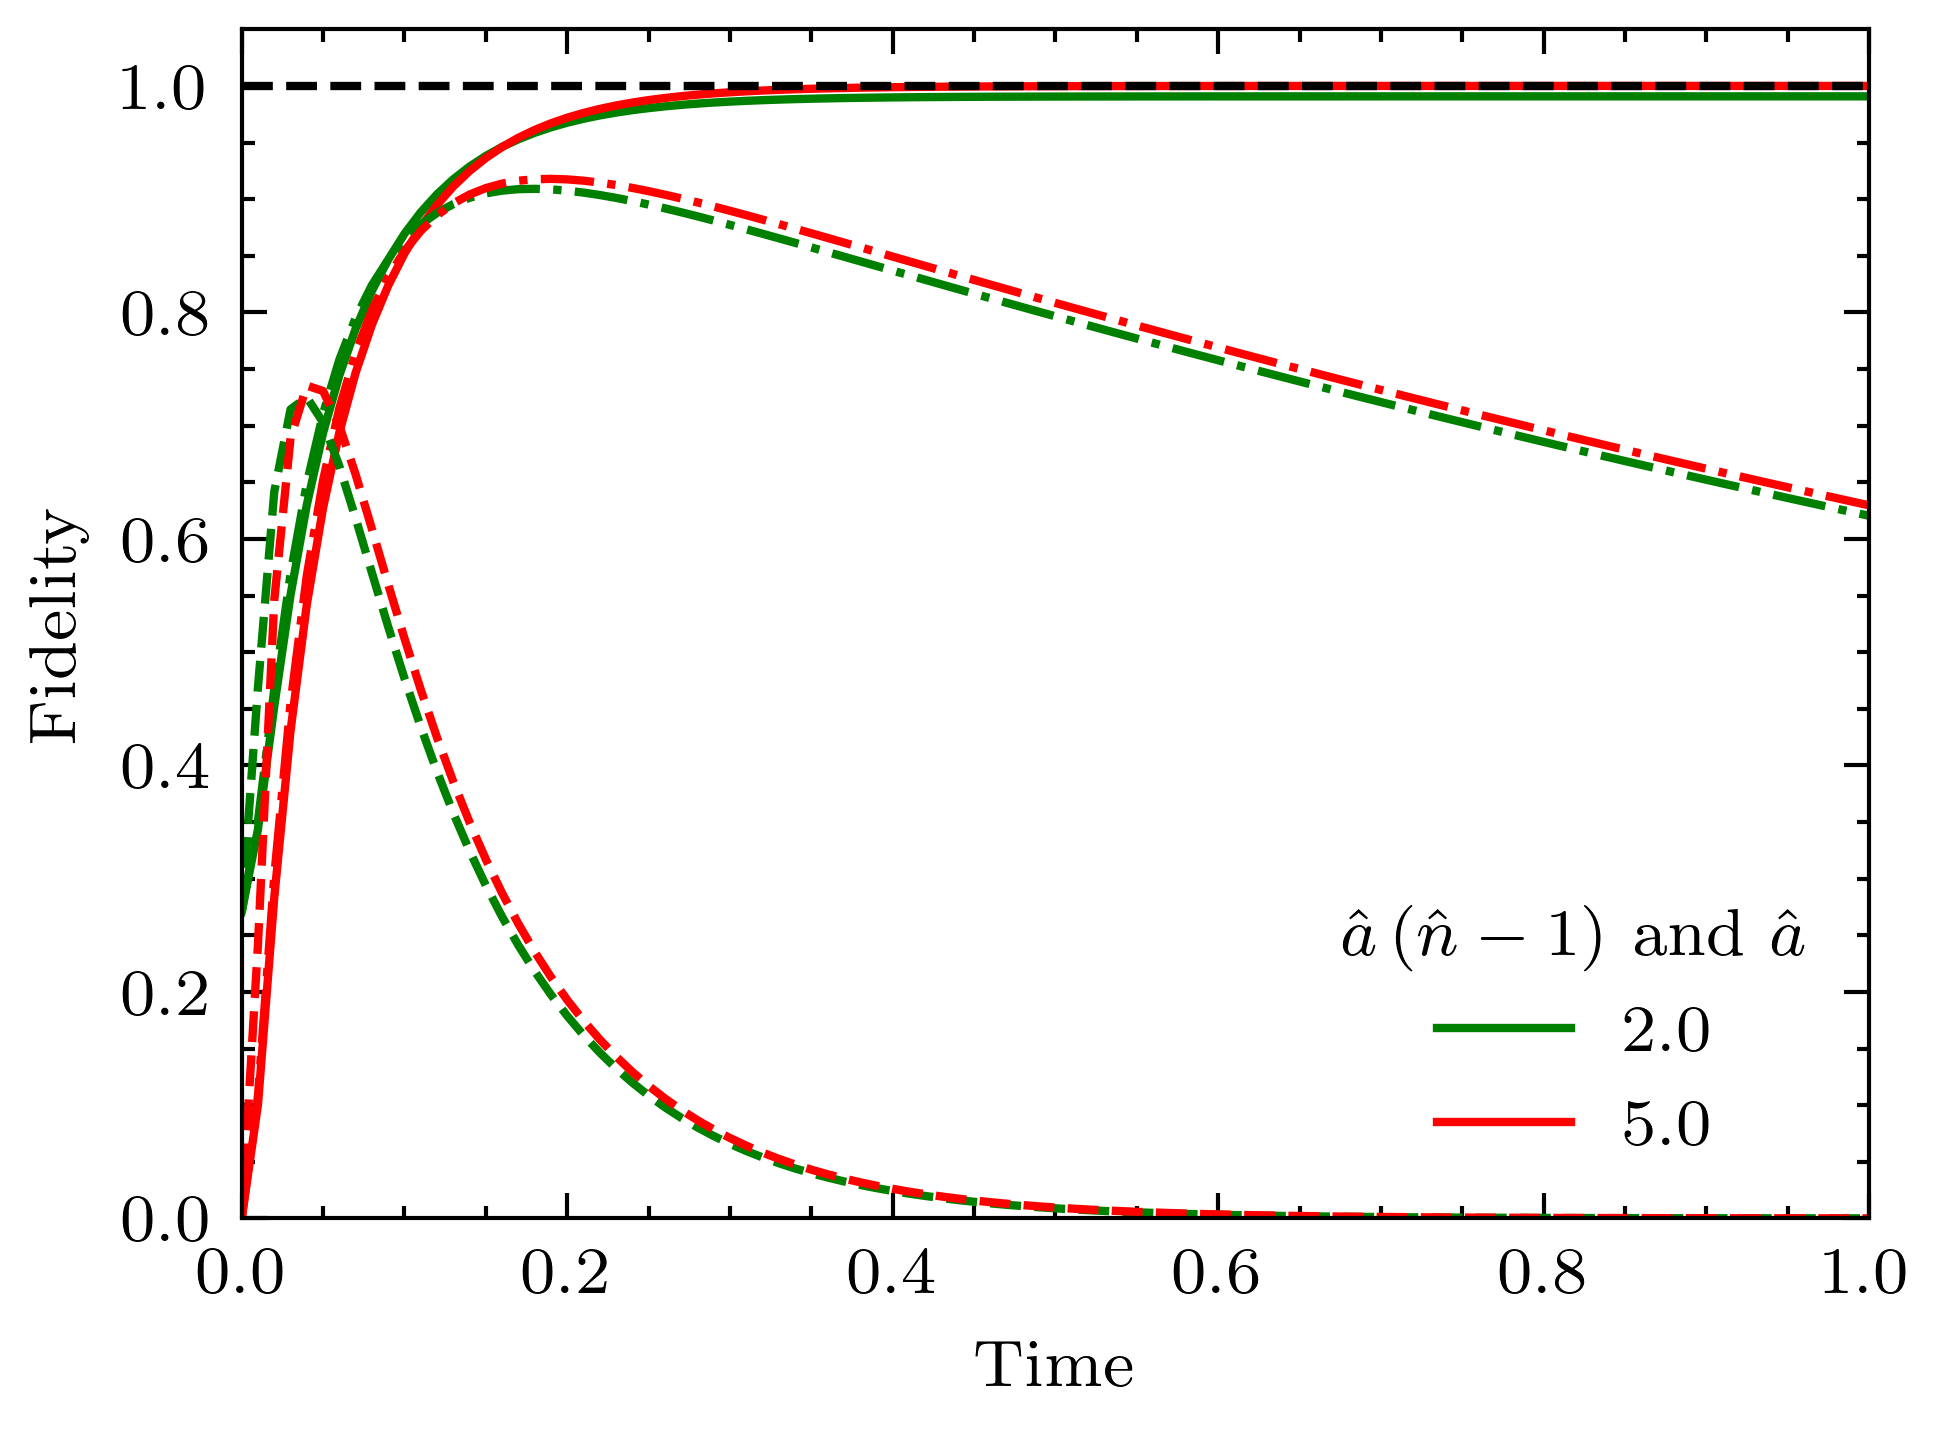

In [69]:
fig, ax = plt.subplots()


ax.plot(tlist, fid_list_one_2_0, color="green", label="$2.0$")
# ax.plot(tlist, fid_list_one_3_0, color="blue", label="$3.0$")
# ax.plot(tlist, fid_list_one_4_0, color="orange", label="4.0")
ax.plot(tlist, fid_list_one_5_0, color="red", label="5.0")

ax.plot(tlist, fid_list_one_2_1, color="green", linestyle="-.")
# ax.plot(tlist, fid_list_one_3_1, color="blue", linestyle="-.")
# ax.plot(tlist, fid_list_one_4_1, color="orange", linestyle="-.")
ax.plot(tlist, fid_list_one_5_1, color="red", linestyle="-.")

ax.plot(tlist, fid_list_one_2_20, color="green", linestyle="--")
# ax.plot(tlist, fid_list_one_3_20, color="blue", linestyle="--")
# ax.plot(tlist, fid_list_one_4_20, color="orange", linestyle="--")
ax.plot(tlist, fid_list_one_5_20, color="red", linestyle="--")







ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
# ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)


fig.savefig("fidelities_ncl1_and_a_different_alphas.pdf")
fig.savefig("fidelities_ncl1_and_a_different_alphas.png", dpi=300)

## Max fidelity

In [ ]:
ncl_decay(alphain, gamma_1)

In [75]:
states_list = ncl_decay(3.0, 20.0)

In [83]:
def max_fidelity(_stateslist):
    fid_list = []
    for idx, val in enumerate(_stateslist):
        fid_list.append(qt.fidelity(val, qt.fock(N, 1)))

    return max(fid_list)

In [90]:
gam_list = np.arange(0.0, 21.0, 1.0)

In [92]:
alphaTest = 2.0;
max_fid_list_2 = []
for idx, val in enumerate(gam_list):
    max_fid_list_2.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [93]:
alphaTest = 3.0;
max_fid_list_3 = []
for idx, val in enumerate(gam_list):
    max_fid_list_3.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [94]:
alphaTest = 1.0;
max_fid_list_1 = []
for idx, val in enumerate(gam_list):
    max_fid_list_1.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [95]:
alphaTest = 4.0;
max_fid_list_4 = []
for idx, val in enumerate(gam_list):
    max_fid_list_4.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


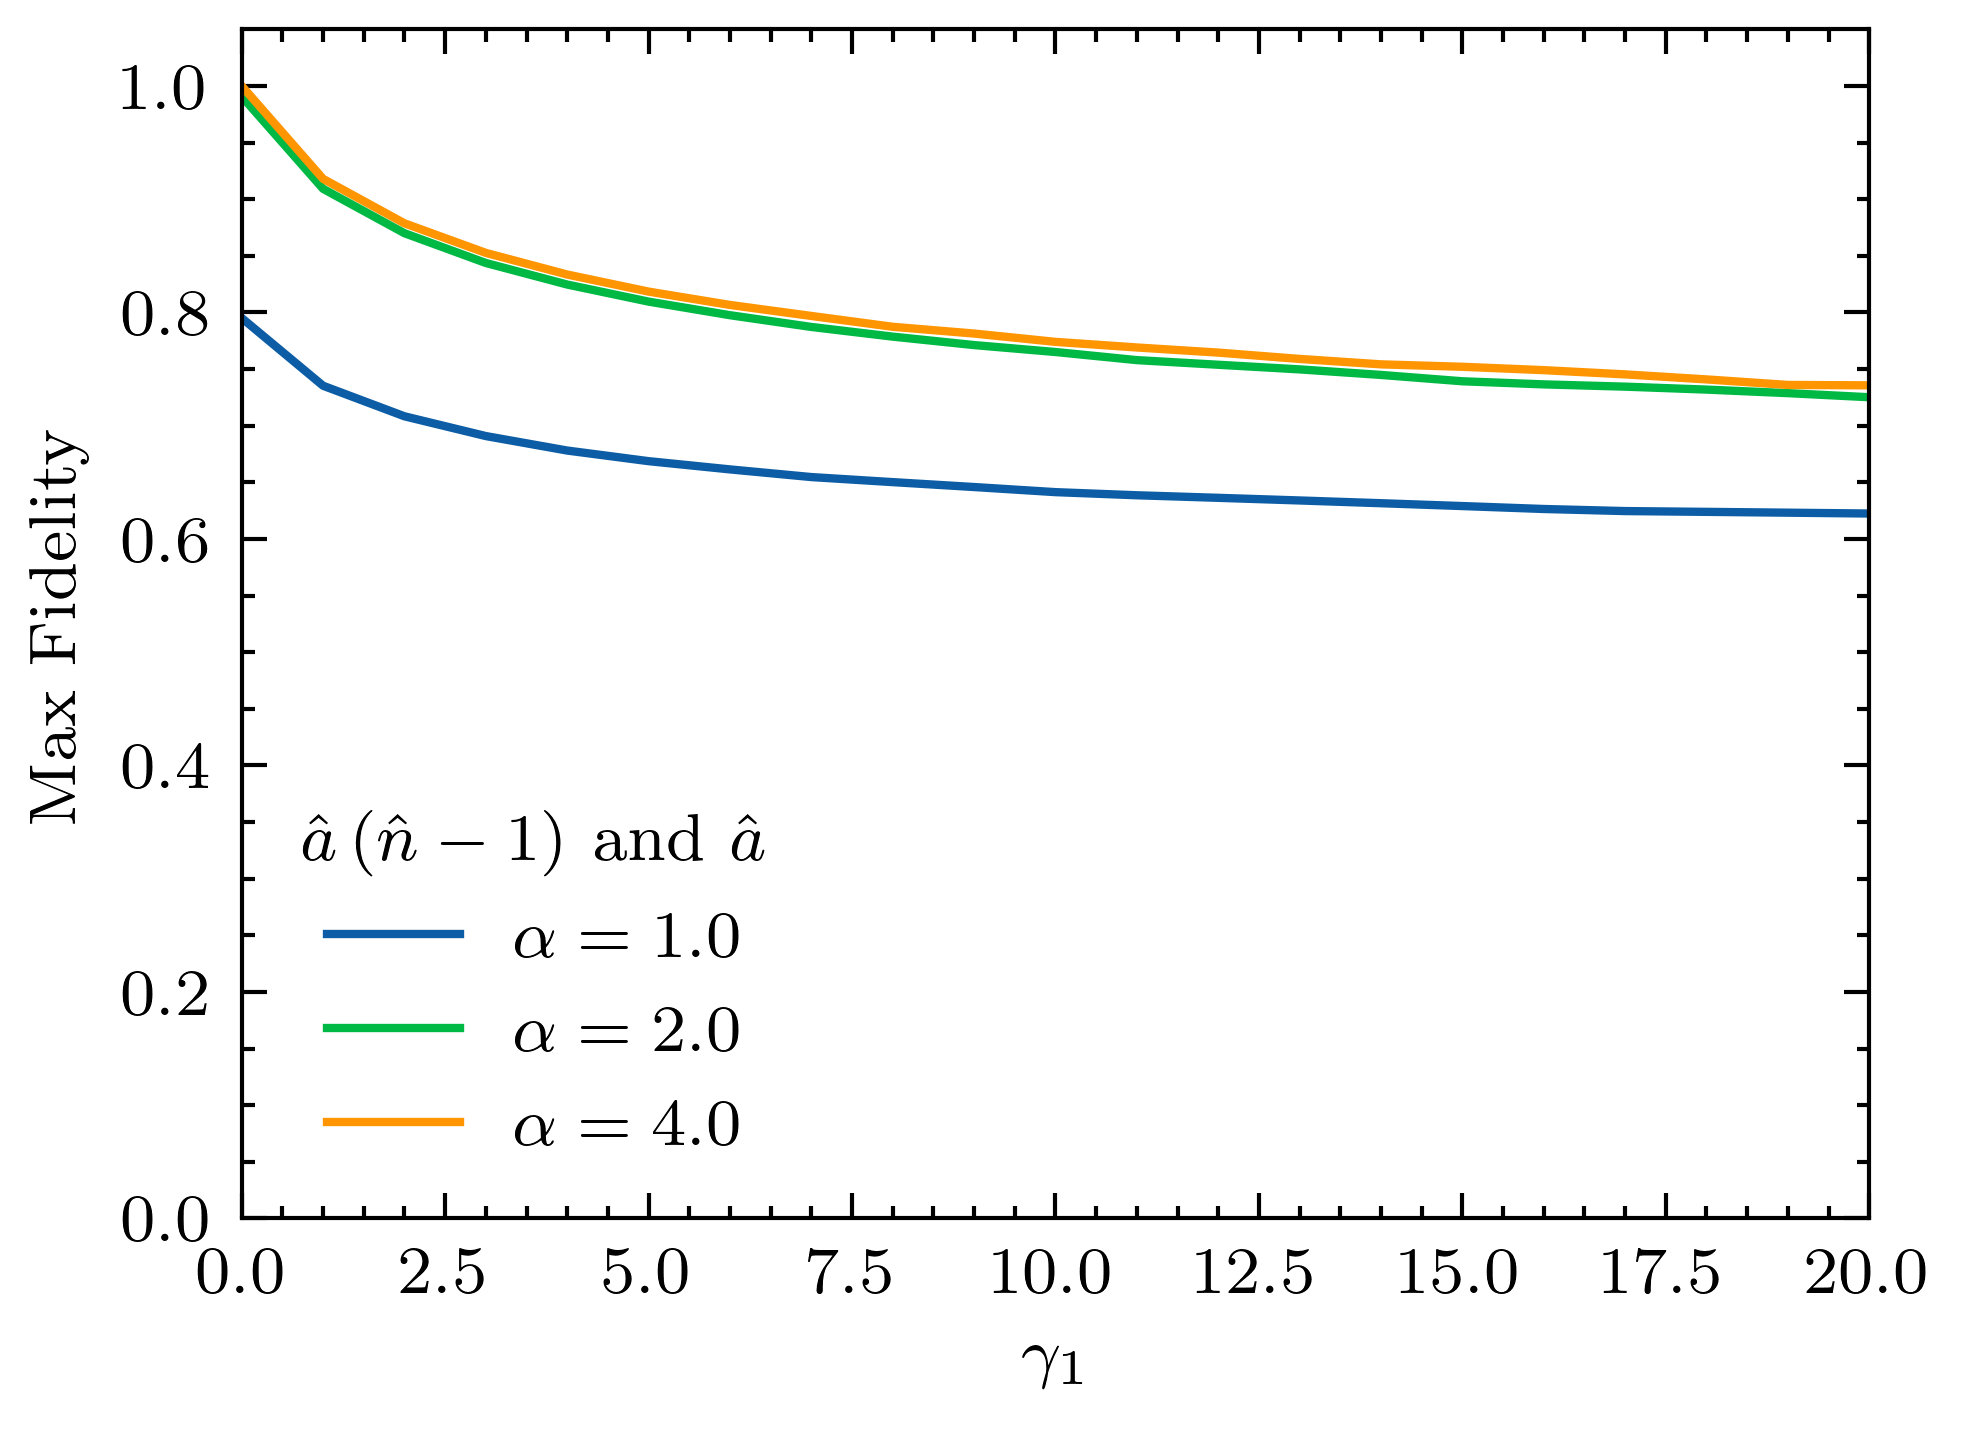

In [98]:
fig, ax = plt.subplots()

ax.plot(gam_list, max_fid_list_1, label="$\\alpha = 1.0$")
ax.plot(gam_list, max_fid_list_2, label="$\\alpha = 2.0$")
# ax.plot(gam_list, max_fid_list_3, label="$\\alpha = 3.0$")
ax.plot(gam_list, max_fid_list_4, label="$\\alpha = 4.0$")


# ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="$\\gamma_1$")
ax.set(ylabel="Max Fidelity")
# ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)


fig.savefig("max_fidelities_vs_gamma1_ncl1_and_a.pdf")
fig.savefig("max_fidelities_vs_gamma1_ncl1_and_a.png", dpi=300)